# <span style="color:red"> Lezione 6</span>

### <span style="color:black"> C++ code </span>

* 6.1

Il codice si basa sulla programmazione ad oggetti:
- `random.h` oggetto che si occupa della generazioni di numeri random.
- `funzioni.h` oggetto in cui sono contenuti metodi utili (scrittura di file `calculation`, inizializzazione rnd, minimo, errore)
- `ising_1D.h` oggetto in cui sono contenuti set e get per la classe e i metodi:
    - `Input(Random& rnd)` metodi che legge dal file `input.dat` per settare tutti i vari parametri
    - `Move(double beta, Random& rnd)` metodo che muove gli spin secondo metropolis oppure gibbs in base alla variabile `metro`
    -  `Auto_eq(Random& rnd, double temp, double sigma)` metodo necessario per l'equilibrazione del nostro sistema. Sono imposti `early_stop=10`, quindi dopo che la media non varia di 0.001 (consecutivamente) per 10 volte si considera il sistema equilibrato
    -  `Measure()` metodo che calcola energia interna, calore specifico, magnetizzazione (h$\not=$0), suscettibilità 


## <span style="color:green"> Esercizio 6.1 </span>

### <span style="color:black">Python code </span>

Definisco funzioni per la lettura (tutti gli output del codice C++, `values_(metodo usato)_(h o meno).dat` e per i plot. I file di output da cui sono caricati i dati sono composti da:

1° colonna|2° colonna|3° colonna|4° colonna|5° colonna|6° colonna|7° colonna
----------|----------|----------|----------|----------|----------|----------
Temperatura|Energia int|Err ene|Calore spec|Err cal_sp|Magn|Err magn|$\chi$|Err $\chi$


In [33]:
import numpy as np
import matplotlib.pyplot as plt
# read
def read(filename):
    temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi = np.loadtxt(f"6.1/"+filename+".0",\
                        usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')
    return temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi
# plot
def Plot_E(i,j):
    temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi = read("values_metro")
    Gtemp, Gene, Gerr_e, Gc, Gerr_c, Gmagn, Gerr_m, Gchi, Gerr_chi = read("values_gibbs")
    ax[i,j].plot(T, e, label='Int ene teo')
    ax[i,j].errorbar(temp,ene,yerr=err_e,alpha=0.8,label='Int ene metro')
    ax[i,j].errorbar(Gtemp,Gene,yerr=Gerr_e,alpha=0.3,label='Int ene gibbs')
    ax[i,j].set_title('Ising 1D, internal energy (with ℎ=0)')
    ax[i,j].set_xlabel('T')
    ax[i,j].set_ylabel('U/N')
    ax[i,j].legend()
    ax[i,j].grid(True)
def Plot_H(i,j):
    temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi = read("values_metro")
    Gtemp, Gene, Gerr_e, Gc, Gerr_c, Gmagn, Gerr_m, Gchi, Gerr_chi = read("values_gibbs")
    ax[i,j].plot(T, heat, label='Heat cap. teo')
    ax[i,j].errorbar(temp,c,yerr=err_c,alpha=0.8,label='Heat cap. metro')
    ax[i,j].errorbar(Gtemp,Gc,yerr=Gerr_c,alpha=0.3,label='Heat cap. gibbs')
    ax[i,j].set_title('Ising 1D, Heat capacity (with ℎ=0)')
    ax[i,j].set_xlabel('T')
    ax[i,j].set_ylabel('C')
    ax[i,j].legend()
    ax[i,j].grid(True)
def Plot_M(i,j):
    temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi = read("values_metro_h")
    Gtemp, Gene, Gerr_e, Gc, Gerr_c, Gmagn, Gerr_m, Gchi, Gerr_chi = read("values_gibbs_h")
    ax[i,j].plot(T, M, label='Magn teo')
    ax[i,j].errorbar(temp,magn,yerr=err_m,alpha=0.8,label='Magn metro')
    ax[i,j].errorbar(Gtemp,Gmagn,yerr=Gerr_m,alpha=0.3,label='Magn gibbs')
    ax[i,j].set_title('Ising 1D, magnetization (with ℎ=0.02)')
    ax[i,j].set_xlabel('T')
    ax[i,j].set_ylabel('M')
    ax[i,j].legend()
    ax[i,j].grid(True)
def Plot_CHI(i,j):
    temp, ene, err_e, c, err_c, magn, err_m, chi, err_chi = read("values_metro")
    Gtemp, Gene, Gerr_e, Gc, Gerr_c, Gmagn, Gerr_m, Gchi, Gerr_chi = read("values_gibbs")
    ax[i,j].plot(T, X, label=f'$\chi$ teo')
    ax[i,j].errorbar(temp,chi,yerr=err_chi,alpha=0.8,label=f'$\chi$ metro')
    ax[i,j].errorbar(Gtemp,Gchi,yerr=Gerr_chi,alpha=0.3,label=f'$\chi$ metro')
    ax[i,j].set_title(f'Ising 1D, $\chi$ (with ℎ=0)')
    ax[i,j].set_xlabel('T')
    ax[i,j].set_ylabel(f'$\chi$')
    ax[i,j].legend()
    ax[i,j].grid(True)

In [34]:
# theoretical
# ENERGY
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
# HEAT CAPACITY
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
# MAGNETIZATION 
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
# MAGNETIC SUSCEPTIBILITY (WITH h=0)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

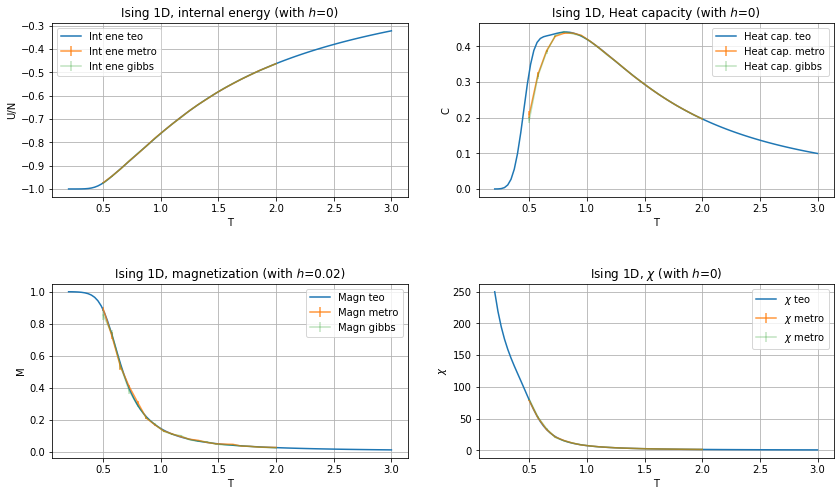

In [36]:
# plotting
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8),gridspec_kw=dict(wspace=0.2, hspace=0.5))
# subplot
# energy
Plot_E(0,0)
# heat capacity
Plot_H(0,1)
# external field
Plot_M(1,0)
# external field
Plot_CHI(1,1)

### Results comment

* Equilibrazione: scegliendo di partire dalla temperatura più alta a scendere, si nota come il numero di steps per raggiungere l'equilibrazione tenta, in generale, a diminuire. Questo è dovuto al fatto che non partiamo da una configurazione random ogni volta, ma una configurazione già equilibrata a una temperatura leggermente più alta.
* Andamento $C_v$ a basse T: questo fatto ho provato a risolverlo, ma senza successo (ho provato pure a considerarlo come varianza). Penso possa essere imputabile per dei tagli nella precisione (a basse temperature gli spin tendono allinearsi producendo così dei valori più elevati) (altri tipi di problemi li escludo perchè le altre quantità hanno andamenti corretti).